### Sklearn中的CART 预测MNIST

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier

digits = load_digits()
data = digits.data

# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

# 创建CART分类器
dtc = DecisionTreeClassifier()
dtc.fit(train_ss_x, train_y)
predict_y = dtc.predict(test_ss_x)
print('CART准确率: %0.4lf' % accuracy_score(predict_y, test_y))

CART准确率: 0.8467


### 用Keras建立一个MNIST的神经网络

In [2]:
## 调所有需要的工具包
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [3]:
#载入数据，看看数据结构
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


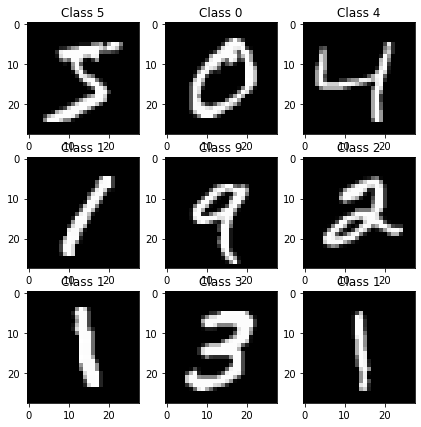

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [5]:
### 做one-hot的准备
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
### 建立神经网络

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [8]:
### 编译模型
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [9]:
### 训练模型
model.fit(X_train, Y_train,
          batch_size=128, 
          verbose=1,
          validation_data=(X_test, Y_test))

469/469 [==============================] - 4s 9ms/step - loss: 0.2491 - val_loss: 0.1018


In [11]:
### 评估模型
score = model.evaluate(X_test, Y_test,
                     verbose=0)
print('Test score:', score)
print('Test accuracy:', score)

Test score: 0.1018044576048851
Test accuracy: 0.1018044576048851


In [12]:
### 检查结果

# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


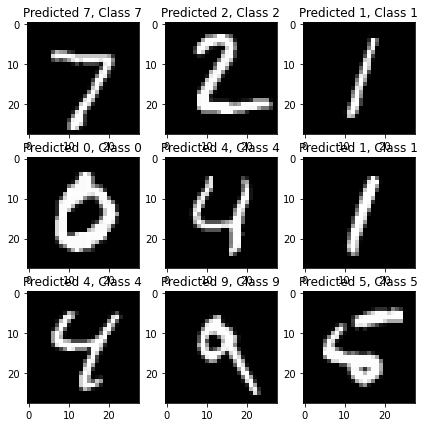

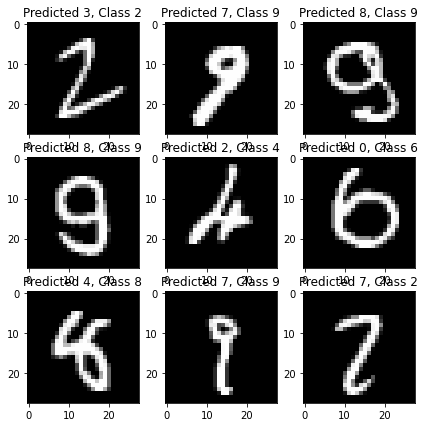

In [13]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
